<a href="https://colab.research.google.com/github/jp3256/blink_detector/blob/main/analyze_blinks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# connect to google drive folder
from google.colab import drive
import glob
drive.mount('/content/drive')
file_directory1 = '/content/drive/My Drive/Applied Research/data/final_study/batch1/'
file_directory2 = '/content/drive/My Drive/Applied Research/data/final_study/batch2/'
file_directory3 = '/content/drive/My Drive/Applied Research/data/final_study/batch3/'
metadata_directory = '/content/drive/My Drive/Applied Research/data/metadata/'

# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import re

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# load batch dataset
df_batch1 = pd.read_csv(file_directory1 + 'batch_results_ear_0_25.csv', index_col=0)
df_batch2 = pd.read_csv(file_directory2 + 'batch_results_ear_0_25.csv', index_col=0)
df_batch3 = pd.read_csv(file_directory3 + 'batch_results.csv', index_col=0)

# sort by group number
df_batch1.sort_values(by='group_number', inplace=True)
df_batch2.sort_values(by='group_number', inplace=True)
df_batch3.sort_values(by='group_number', inplace=True)

# rename columns (fix typo)
df_batch1.rename(columns={"condiiton": "condition"}, inplace=True)
df_batch2.rename(columns={"condiiton": "condition"}, inplace=True)

# convert role to lowercase
df_batch1['role'] = df_batch1['role'].apply(lambda x: x.lower() if type(x)==str else x)
df_batch2['role'] = df_batch2['role'].apply(lambda x: x.lower() if type(x)==str else x)
df_batch3['role'] = df_batch3['role'].apply(lambda x: x.lower() if type(x)==str else x)

# fill missing role information
df_batch1['role'] = np.where(df_batch1.role.isna(), 'w', df_batch1.role)

In [3]:
df_batch1.sort_values(by='number_blinks', ascending=True).head()

## BATCH 1
#group 106 w: eyes outside frame
#group 106 nw: CHECK - redo with new threshold 0.25?
#group 107 w: CHECK - redo with new threshold 0.25?
#group 120 nw: looks sideways
#group 123 nw: CHECK - redo with new threshold 0.25?
#group 123 w: eyes outside frame
#group 131 w: eyes on edge of frame
#group 137 nw: eyes too close to edge
#group 147 nw: out of frame
#group 147 w: CHECK - redo with new threshold 0.25?
#group 153 nw: CHECK - redo with new threshold 0.25?
#group 156 nw: face angle
#group 158 nw: out of frame

## BATCH 2
#group 219 nw: might want to exclude - false detection due to small eyes
#group 173 nw: face sideways
#group 194 nw: eyes on edge of frame
#group 215 nw: can't detect eyes due to lighting & hat
#group 197 nw: CHECK - redo with new threshold 0.25?
#group 211 nw: poor lighting - can't detect eyes
#group 185 nw: CHECK - redo with new threshold 0.25?
#group 169 nw: CHECK - redo with new threshold 0.25?
#group 170 w: CHECK - redo with new threshold 0.25?
#group 212 nw: face looking sideways/out of frame
#group 181 nw: face looking sideways
#group 172 nw: face looking sideways
#group 168 w: CHECK - redo with new threshold 0.25?
#group 206 nw: poor lighting, out of frame
#group 220 nw: CHECK - redo with new threshold 0.25?
#group 174 w: CHECK - redo with new threshold 0.25?

## BATCH 3
#group 224 w: CHECK - false detection due to small eyes?
#group 260 nw: CHECK
#group 277 w: CHECK
#group 257 nw: poor lighting
#group 277 nw: poor lighting, hair covering face, face angle
#group 248 nw: CHECK
#group 276 nw: face angle, out of frame
#group 273 w: CHECK
#group 233 nw: CHECK
#group 244 nw: CHECK
#group 268 nw: CHECK - poor eye detection due to reflection on glasses
#group 229 nw: CHECK
#group 229 w: CHECK

,group_number,condition,role,number_blinks
32,158,c,nw,0
69,106,c,w,2
14,147,c,nw,5
39,131,c,w,16
34,106,c,nw,51


In [4]:
# exclude videos with problems
df_batch1 = df_batch1.drop(df_batch1[np.logical_and(df_batch1.group_number==106, df_batch1.role=='w')].index)
df_batch1 = df_batch1.drop(df_batch1[np.logical_and(df_batch1.group_number==120, df_batch1.role=='nw')].index)
df_batch1 = df_batch1.drop(df_batch1[np.logical_and(df_batch1.group_number==123, df_batch1.role=='w')].index)
df_batch1 = df_batch1.drop(df_batch1[np.logical_and(df_batch1.group_number==131, df_batch1.role=='w')].index)
df_batch1 = df_batch1.drop(df_batch1[np.logical_and(df_batch1.group_number==137, df_batch1.role=='nw')].index)
df_batch1 = df_batch1.drop(df_batch1[np.logical_and(df_batch1.group_number==147, df_batch1.role=='nw')].index)
df_batch1 = df_batch1.drop(df_batch1[np.logical_and(df_batch1.group_number==156, df_batch1.role=='nw')].index)
df_batch1 = df_batch1.drop(df_batch1[np.logical_and(df_batch1.group_number==158, df_batch1.role=='nw')].index)

df_batch2 = df_batch2.drop(df_batch2[np.logical_and(df_batch2.group_number==219, df_batch2.role=='nw')].index)
df_batch2 = df_batch2.drop(df_batch2[np.logical_and(df_batch2.group_number==173, df_batch2.role=='nw')].index)
df_batch2 = df_batch2.drop(df_batch2[np.logical_and(df_batch2.group_number==194, df_batch2.role=='nw')].index)
df_batch2 = df_batch2.drop(df_batch2[np.logical_and(df_batch2.group_number==215, df_batch2.role=='nw')].index)
df_batch2 = df_batch2.drop(df_batch2[np.logical_and(df_batch2.group_number==211, df_batch2.role=='nw')].index)
df_batch2 = df_batch2.drop(df_batch2[np.logical_and(df_batch2.group_number==212, df_batch2.role=='nw')].index)
df_batch2 = df_batch2.drop(df_batch2[np.logical_and(df_batch2.group_number==181, df_batch2.role=='nw')].index)
df_batch2 = df_batch2.drop(df_batch2[np.logical_and(df_batch2.group_number==172, df_batch2.role=='nw')].index)
df_batch2 = df_batch2.drop(df_batch2[np.logical_and(df_batch2.group_number==206, df_batch2.role=='nw')].index)

df_batch3 = df_batch3.drop(df_batch3[np.logical_and(df_batch3.group_number==257, df_batch3.role=='nw')].index)
df_batch3 = df_batch3.drop(df_batch3[np.logical_and(df_batch3.group_number==277, df_batch3.role=='nw')].index)
df_batch3 = df_batch3.drop(df_batch3[np.logical_and(df_batch3.group_number==276, df_batch3.role=='nw')].index)


In [5]:
# df_batch1 = df_batch1[df_batch1.number_blinks>=50]
# df_batch1 = df_batch1[df_batch1.number_blinks<450]
# df_batch2 = df_batch2[df_batch2.number_blinks>=50]
# df_batch2 = df_batch2[df_batch2.number_blinks<450]
# df_batch3 = df_batch3[df_batch3.number_blinks>=50]
# df_batch3 = df_batch3[df_batch3.number_blinks<450]

## Merge Batches

In [6]:
df_merged = pd.concat([df_batch1, df_batch2, df_batch3])
df_merged.groupby('condition')['number_blinks'].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
c,131.0,242.854962,109.505049,51.0,165.00,234.0,303.0,610.0
s,142.0,219.084507,116.142276,0.0,140.75,213.0,272.0,548.0


In [7]:
df_merged.groupby('role')['number_blinks'].describe()

,count,mean,std,min,25%,50%,75%,max
role,,,,,,,,
nw,129.0,218.736434,119.493365,0.0,122.00,209.0,292.0,530.0
w,144.0,241.020833,107.021694,1.0,168.75,231.5,287.0,610.0


## Metadata

In [8]:
# load idea generation data
df_idea = pd.read_csv(metadata_directory + 'study2_idea_generation.csv')
df_idea.head()

,Group.Number,cond,creative_count,idea_number,avg_creative,var_creative,avg_top_creative
0,101,s,3,8,3.593750,0.915516,4.500000
1,105,s,6,12,3.500000,0.533002,3.916667
2,106,c,7,10,3.650000,0.647645,3.928571
3,107,c,5,14,3.464286,0.685405,4.250000
4,108,s,4,10,3.500000,0.623610,4.187500


In [9]:
# load survey data
df_survey = pd.read_csv(metadata_directory + 'study2_survey_mean.csv')
df_survey.head()

,Group.Number,money_entrust,arousal,valence,dominant,diff1_t1,enjoy_t1,sat_t1,diff2_t1,diff1_t2,enjoy_t2,sat_t2,diff2_t2,tech,self_ext,self_agree,self_neuro,self_open,self_cons,part_ext,part_agree,part_neuro,part_open,part_cons,warm_mean,comp_mean,pri_mean,pub_mean,per_self_att,per_part_att,per_both_att,cond
0,101,5.0,20.5,87.5,54.0,4.0,5.5,6.0,2.5,4.5,4.0,6.0,1.0,2.0,4.25,4.25,2.00,6.5,4.75,4.25,4.00,1.50,5.75,5.50,6.000,5.1,3.00,1.75,0.437500,0.375000,0.1875,S
1,105,10.0,54.5,78.5,50.5,5.5,5.0,4.5,4.5,5.5,4.5,4.5,4.0,3.5,4.50,4.50,3.25,4.0,5.75,4.25,3.75,2.25,4.50,5.25,6.250,5.2,3.00,2.75,0.416667,0.458333,0.1250,S
2,106,10.0,50.0,89.0,51.0,5.0,4.0,4.0,2.5,2.0,3.0,5.0,1.0,1.0,4.75,4.50,1.50,5.5,6.75,4.50,4.50,1.00,6.00,7.00,6.625,6.9,2.50,1.00,0.500000,0.500000,0.0000,T
3,107,5.0,26.0,68.5,54.5,4.5,5.5,4.5,3.0,3.5,3.5,4.5,2.0,4.0,4.50,5.25,5.00,5.0,5.25,4.00,4.25,2.50,5.00,5.75,5.500,5.1,2.25,1.50,0.000000,0.000000,1.0000,T
4,108,6.0,25.5,59.5,44.0,5.5,3.5,5.0,4.5,4.0,3.5,5.5,2.0,1.0,3.50,4.75,5.00,4.5,5.00,4.75,4.50,3.00,5.25,5.75,5.750,4.8,2.50,2.50,0.450000,0.450000,0.1000,S


In [10]:
# merge blink data with metadata
df_merged1 = df_merged.merge(df_idea, left_on='group_number', right_on='Group.Number', how='left')
df_merged1 = df_merged1.merge(df_survey, left_on='group_number', right_on='Group.Number', how='left')
df_merged1.head()

,group_number,condition,role,number_blinks,Group.Number_x,cond_x,creative_count,idea_number,avg_creative,var_creative,avg_top_creative,Group.Number_y,money_entrust,arousal,valence,dominant,diff1_t1,enjoy_t1,sat_t1,diff2_t1,diff1_t2,enjoy_t2,sat_t2,diff2_t2,tech,self_ext,self_agree,self_neuro,self_open,self_cons,part_ext,part_agree,part_neuro,part_open,part_cons,warm_mean,comp_mean,pri_mean,pub_mean,per_self_att,per_part_att,per_both_att,cond_y
0,101,s,nw,477,101,s,3,8,3.59375,0.915516,4.500000,101.0,5.0,20.5,87.5,54.0,4.0,5.5,6.0,2.5,4.5,4.0,6.0,1.0,2.0,4.25,4.25,2.00,6.5,4.75,4.25,4.00,1.50,5.75,5.50,6.000,5.1,3.0,1.75,0.437500,0.375000,0.1875,S
1,101,s,w,170,101,s,3,8,3.59375,0.915516,4.500000,101.0,5.0,20.5,87.5,54.0,4.0,5.5,6.0,2.5,4.5,4.0,6.0,1.0,2.0,4.25,4.25,2.00,6.5,4.75,4.25,4.00,1.50,5.75,5.50,6.000,5.1,3.0,1.75,0.437500,0.375000,0.1875,S
2,105,s,nw,173,105,s,6,12,3.50000,0.533002,3.916667,105.0,10.0,54.5,78.5,50.5,5.5,5.0,4.5,4.5,5.5,4.5,4.5,4.0,3.5,4.50,4.50,3.25,4.0,5.75,4.25,3.75,2.25,4.50,5.25,6.250,5.2,3.0,2.75,0.416667,0.458333,0.1250,S
3,105,s,w,162,105,s,6,12,3.50000,0.533002,3.916667,105.0,10.0,54.5,78.5,50.5,5.5,5.0,4.5,4.5,5.5,4.5,4.5,4.0,3.5,4.50,4.50,3.25,4.0,5.75,4.25,3.75,2.25,4.50,5.25,6.250,5.2,3.0,2.75,0.416667,0.458333,0.1250,S
4,106,c,nw,51,106,c,7,10,3.65000,0.647645,3.928571,106.0,10.0,50.0,89.0,51.0,5.0,4.0,4.0,2.5,2.0,3.0,5.0,1.0,1.0,4.75,4.50,1.50,5.5,6.75,4.50,4.50,1.00,6.00,7.00,6.625,6.9,2.5,1.00,0.500000,0.500000,0.0000,T


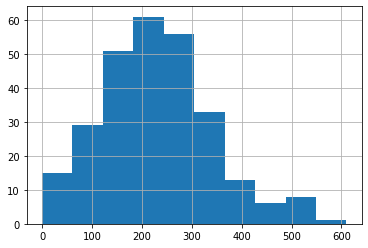

In [11]:
df_merged1.number_blinks.hist()

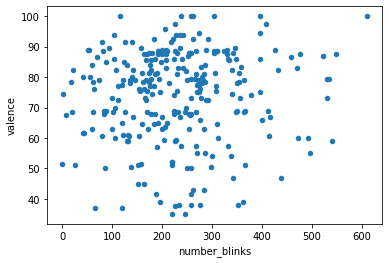

In [12]:
df_merged1.plot(x='number_blinks',y='valence',kind='scatter')

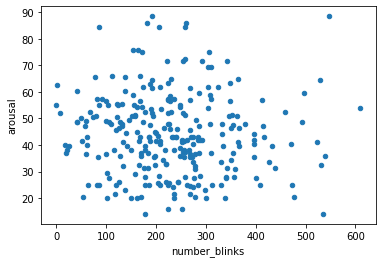

In [13]:
df_merged1.plot(x='number_blinks',y='arousal',kind='scatter')

In [14]:
# from sklearn import linear_model

# # define the data/predictors as the pre-set feature names  
# X = df_merged1[['number_blinks']]

# # Put the target (housing value -- MEDV) in another DataFrame
# y = df_merged1[['arousal']]

# lm = linear_model.LinearRegression()
# model = lm.fit(X,y)

# predictions = lm.predict(X)

# lm.score(X,y) # R^2


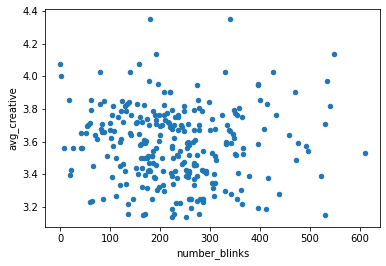

In [15]:
df_merged1.plot(x='number_blinks',y='avg_creative',kind='scatter')

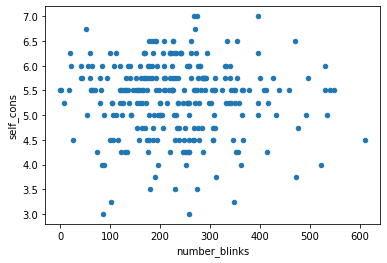

In [16]:
df_merged1.plot(x='number_blinks',y='self_cons',kind='scatter')

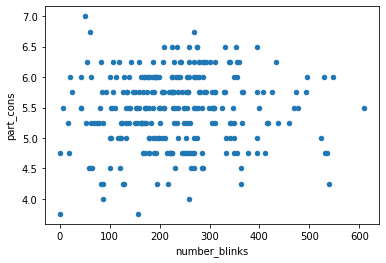

In [17]:
df_merged1.plot(x='number_blinks',y='part_cons',kind='scatter')

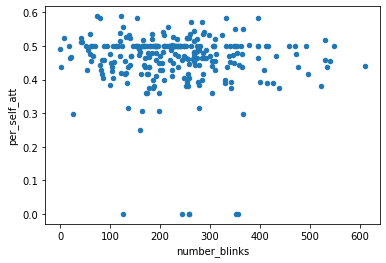

In [18]:
df_merged1.plot(x='number_blinks',y='per_self_att',kind='scatter')

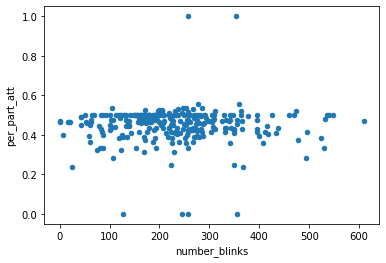

In [19]:
df_merged1.plot(x='number_blinks',y='per_part_att',kind='scatter')

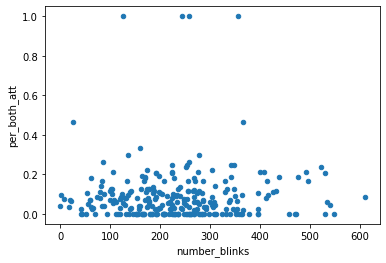

In [20]:
df_merged1.plot(x='number_blinks',y='per_both_att',kind='scatter')